## Importing libraries

In [1]:
import numpy as np
from matplotlib import image
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
import matplotlib.pyplot as plt
from scipy import signal

## Loading image

In [2]:
img = image.imread('Flowers.jpg').astype('uint16')

In [3]:
img.shape

(2000, 1500, 3)

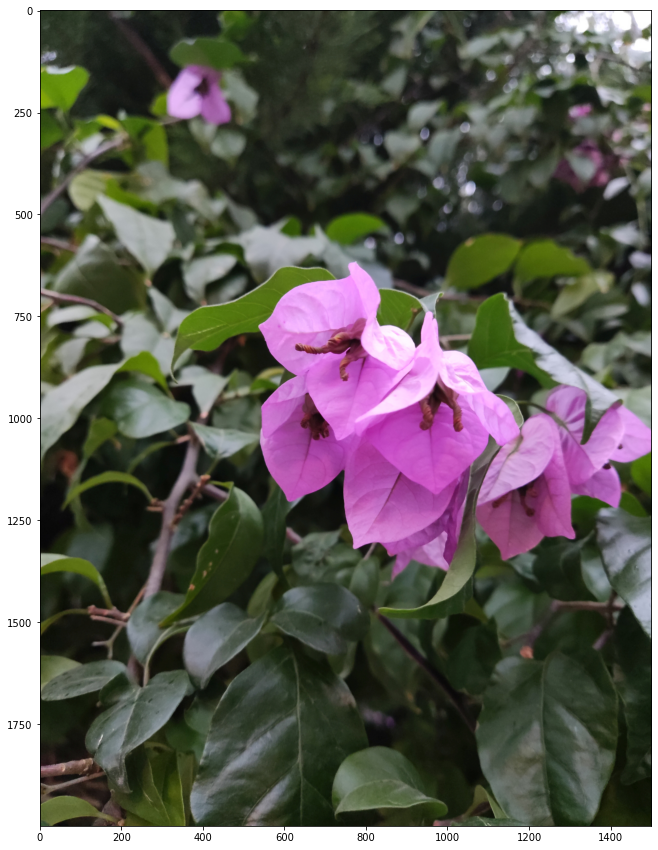

In [4]:
plt.figure(figsize=(15, 15))
plt.imshow(img);

## Change color + Bluring

**Change color:** 

1. Converting RGB image to HSV 
2. Using Hue of the HSV we can determine the pink values
3. Shifting the Hue value of pink pixels to become yellow (Using the below picture)
   
<div align="center">
    <img src='https://www.researchgate.net/profile/Ravindran-G/publication/321126312/figure/fig1/AS:561582682722304@1510903153364/llustration-of-the-HSV-Color-Space-B-Color-Feature-Extraction-Color-feature-is-extracted.png' />
</div>

**Bluring :**

1. Convole a simple box blur to achieve a blurred image
2. replace the flowers with the their sharp image (with the help of the mask from finding pink colors)

In [14]:
hsv_image = rgb_to_hsv(img)

# ------------- Converting pink to yellow ------------- #
pink_indices = np.vectorize(lambda x: 0.75 <= x <= 0.91)(hsv_image[:, :, 0])
hsv_image[pink_indices, 0] -= 0.666667

# ------------- Blurring ------------- #
rgb_image = hsv_to_rgb(hsv_image)
f = np.ones((11, 11))/121
for i in range(3):
    rgb_image[:, :, i] = signal.convolve2d(rgb_image[:, :, i], f, mode='same')

# ------------- Placing Flowers (without blurring) ------------- #
rgb_image[pink_indices] = hsv_to_rgb(hsv_image[pink_indices])

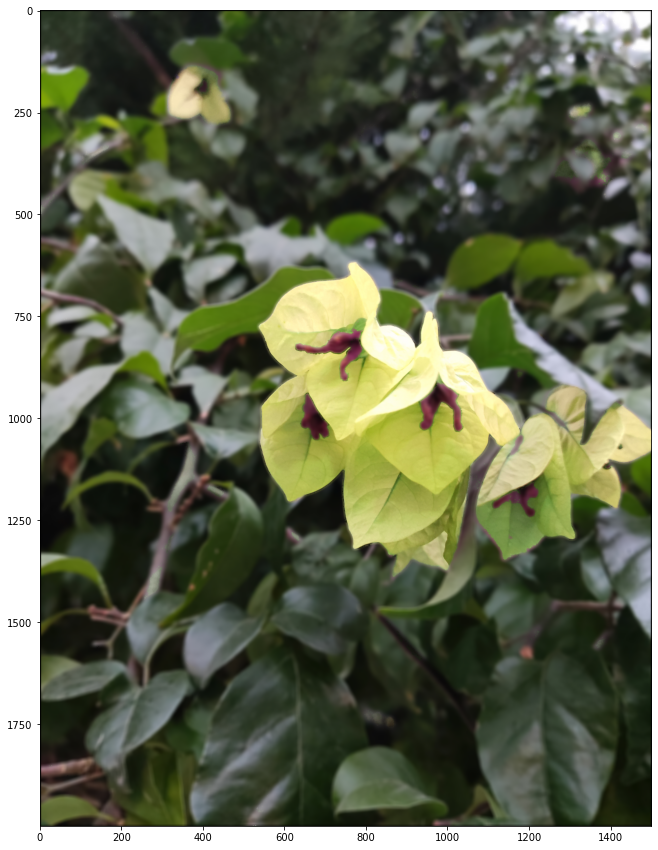

In [15]:
plt.figure(figsize=(15, 15))
plt.imshow(rgb_image.astype('int'));